# Comparison of methods for eigenvalue decomposition

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
# open file
path = os.getenv("CUADMM_SOLVER_OUTPUT_PATH")
assert path is not None, "CUADMM_SOLVER_OUTPUT_PATH environment variable not set"

In [3]:
results = []

file = open(path + '/single_batched_comparison.txt', 'r')
for line in file.readlines():
    mat_size, mat_num, time_single, time_batched = line.split()
    results.append({
        'mat_size': int(mat_size),
        'mat_num': int(mat_num),
        'time_single': float(time_single),
        'time_batched': float(time_batched)
    })

df = pd.DataFrame(results)
df["single_minus_batched"] = df["time_single"] - df["time_batched"]
df["is_single_slower"] = np.where(df["single_minus_batched"] > 0, 1, -1)

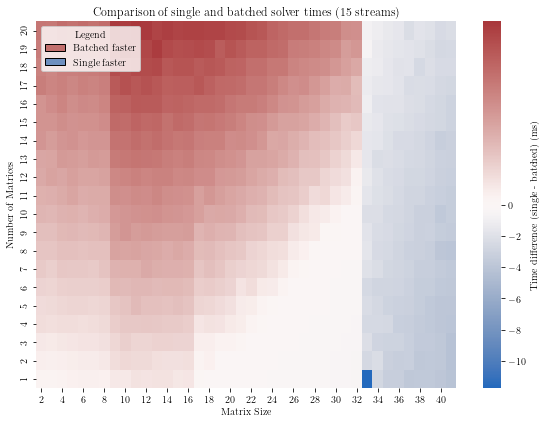

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.heatmap(
    ax=ax,
    data=df.pivot_table(index="mat_num", columns="mat_size", values="single_minus_batched"),
    norm=mcolors.TwoSlopeNorm(vcenter=0, vmin=df["single_minus_batched"].min(), vmax=df["single_minus_batched"].max()),
    cmap="vlag",
    # cmap=sns.color_palette("vlag", as_cmap=True),
    # vmin=-1.0, vmax=1.0,
    cbar_kws={'label': 'Time difference (single - batched) (ms)'},
    annot=False,
)
ax.invert_yaxis()
fig.set_xlabel("Matrix Size")
fig.set_ylabel("Number of Matrices")
fig.set_title("Comparison of single and batched solver times (15 streams)")

palette = sns.color_palette("vlag", as_cmap=False)
legend_elements = [
    Patch(facecolor=palette[-1], edgecolor='black', label='Batched faster'),
    Patch(facecolor=palette[0], edgecolor='black', label='Single faster')
]
ax.legend(handles=legend_elements, loc='upper left', title="Legend")

plt.tight_layout()
plt.savefig('pdf/single_batched_comparison_1.pdf')

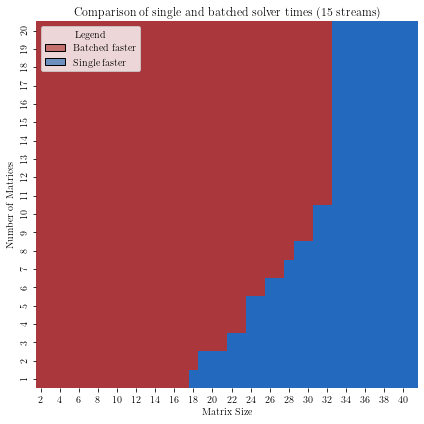

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = sns.heatmap(
    ax=ax,
    data=df.pivot_table(index="mat_num", columns="mat_size", values="is_single_slower"),
    cmap=sns.color_palette("vlag", as_cmap=True),
    vmin=-1.0, vmax=1.0,
    annot=False,
    cbar=False,
)
ax.invert_yaxis()
fig.set_xlabel("Matrix Size")
fig.set_ylabel("Number of Matrices")
fig.set_title("Comparison of single and batched solver times (15 streams)")

palette = sns.color_palette("vlag", as_cmap=False)
legend_elements = [
    Patch(facecolor=palette[-1], edgecolor='black', label='Batched faster'),
    Patch(facecolor=palette[0], edgecolor='black', label='Single faster')
]
ax.legend(handles=legend_elements, loc='upper left', title="Legend")

plt.tight_layout()
plt.savefig('pdf/single_batched_comparison_2.pdf')